<a href="https://colab.research.google.com/github/RonnyGuevara/Fractal_Images/blob/main/TP5/TP5_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

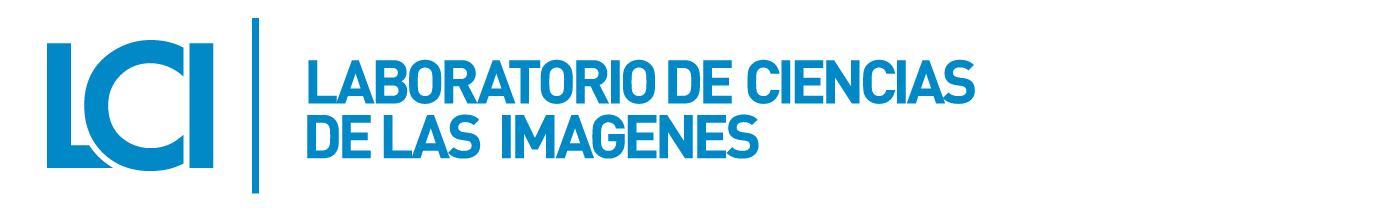

#Práctica 5: Fractales no determinísticos

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar un aplicativo que permita renderizar ruido Browniano fraccional (fBm) en 1 dimensión
## Objetivos Específicos
*   Implementar ruido Browniano fraccional utilizando el modelo de desplazamiento aleatorio del punto medio (RMDA)
*   Visualizar los resultados

###Problema
Implementar ruido Browniano fraccional en 1D utilizando el modelo de desplazamiento aleatorio del punto medio. Verificar que posee las
propiedades espectrales esperadas.

##Desarrollo
El desarrollo se divide en 2 etapas, la primera tiene como objetivo el renderizado del ruido blanco. En la segunda etapa, la computación del ruido Browniano utilizando el modelo de desplazamiento aleatorio del punto medio (RMDA)

###Primera Etapa
####White noise

In [1]:
#Lectura de librerías
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Potencia')

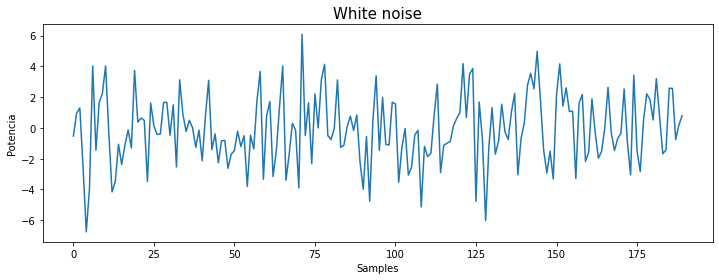

In [2]:
#@title Seleccione la escala { run: "auto" }
escala_x = 190 #@param {type:"slider", min:0, max:1000, step:10}
escala_y = 2.3 #@param {type:"slider", min:0, max:10, step:0.1}
samples_white = np.random.normal(0, 1, size=[escala_x,1])
plt.figure(figsize=(12, 4))
plt.title("White noise", fontsize = 15)
plt.plot(escala_y*samples_white)
plt.xlabel("Samples")
plt.ylabel("Potencia")

###Segunda etapa
#### Rendering brownian noise: suma acumulada de un ruido blanco con media cero

Text(0, 0.5, 'Potencia')

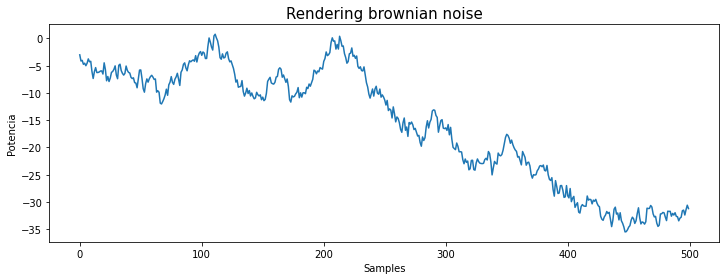

In [3]:
samples = np.random.randn(500).cumsum()
plt.figure(figsize=(12, 4))
plt.title("Rendering brownian noise", fontsize = 15)
plt.plot(samples)
plt.xlabel("Samples")
plt.ylabel("Potencia")

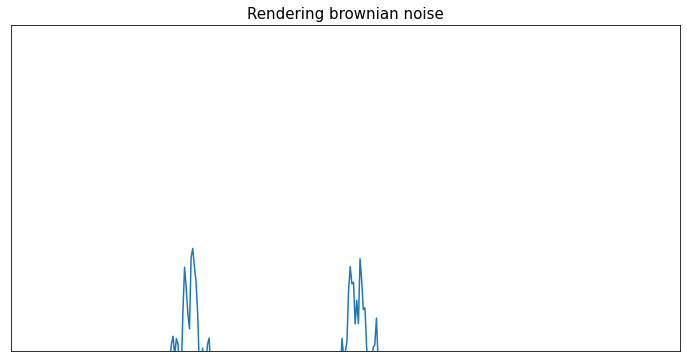

In [4]:
#@title Seleccione la escala { run: "auto" }
escala_x = 1.5 #@param {type:"slider", min:1, max:20, step:0.5}
escala_y = 17 #@param {type:"slider", min:1, max:20, step:0.5}
samples2 = np.arange(len(samples))
escala_x = np.sqrt(escala_x)
newarr = np.multiply(samples, escala_y)
newarr2 = np.multiply(samples2, escala_x)
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(newarr2,newarr)
ax.set_xlim(left=-0, right=500)
ax.set_ylim(-50,150)
plt.title("Rendering brownian noise", fontsize = 15)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#### Rendering brownian noise: modelo de desplazamiento aleatorio del punto medio (RMDA)

In [5]:
def gauss(sigma):
  sigma = 2 * sigma
  a1 = sigma * np.random.random()-sigma/2
  a2 = sigma * np.random.random()-sigma/2
  a3 = sigma * np.random.random()-sigma/2
  a4 = sigma * np.random.random()-sigma/2
  a5 = sigma * np.random.random()-sigma/2
  a6 = sigma * np.random.random()-sigma/2
  a7 = sigma * np.random.random()-sigma/2
  a8 = sigma * np.random.random()-sigma/2
  r = (a1 + a2+ a3+ a4+ a5+ a6 +a7 +a8)/8
  return r

def brow(n, h, a, b):
  sigma = abs(b-a)
  g = gauss(sigma)
  x0=[a,0]
  x1=[b,g]
  l = [x0,x1]
  for i in range (1, n+1):
    ll=[]
    ll.append(x0)
    for j in range(1,len(l)):
      r = gauss(sigma)
      ll.append([(l[j-1][0]+l[j][0])/2,(l[j-1][1]+l[j][1])/2 +1/2*(h*i)*r])
      ll.append(l[j])

    l = np.array(ll)

  t = [l[i][0]for i in range(len(l))]
  x = [l[i][1]for i in range(len(l))]

  print(x1)
  print(len(x))
  fig, ax = plt.subplots(figsize = (12, 6))
  ax.plot(t,x)
  #ax.set_xlim(left=0.5, right=1)
  ax.set_ylim(-10,10)
  plt.title("Brownian noise representation (original)", fontsize = 15)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  return (t,x)

[1, -0.2757422021486524]
2049


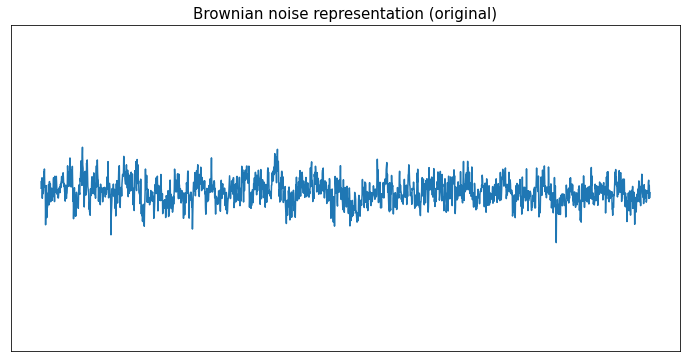

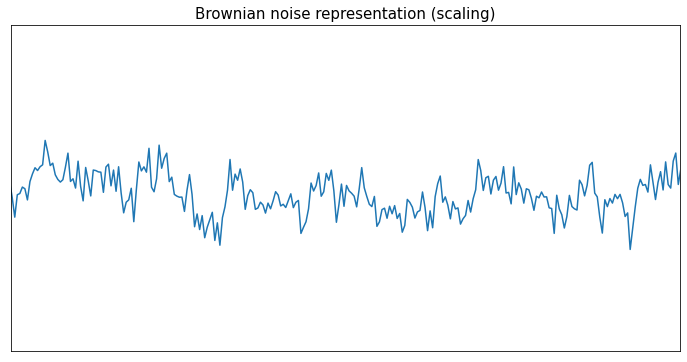

In [6]:
#@title Seleccione la escala { run: "auto" }
iterations = 11 #@param {type:"slider", min:1, max:15, step:1}
dim_fractal = 0.5 #@param {type:"slider", min:0.1, max:4, step:0.1}
escala_x = 15 #@param {type:"slider", min:1, max:20, step:0.5}
escala_y = 3 #@param {type:"slider", min:1, max:20, step:0.5}
t , x = brow(iterations,dim_fractal,0,1)
escala_x = np.sqrt(escala_x)
newarr = np.multiply(x, escala_y)
newarr2 = np.multiply(t, escala_x)
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(newarr2,newarr)
ax.set_xlim(left=0.5, right=1)
ax.set_ylim(-20,20)
plt.title("Brownian noise representation (scaling)", fontsize = 15)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

##Análisis de resultados

*   Se desarrolla un aplicativo que permite renderizar el ruido Browniano fraccional (fBm) en 1 dimensión utilizando la tecnica de la suma acumulada de un ruido blanco con media cero y el modelo de desplazamiento aleatorio del punto medio (RMDA)

*   El usuario puede interactuar con el aplicativo mediante scrollbars, donde se permite variar la escala de los ejes.